<a href="https://colab.research.google.com/github/gangakailas/DeepLearning/blob/main/MDS_and_StressFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Silhouette Scores (higher = clearer separation):
PCA: 0.526
Metric MDS: 0.461
Non-Metric MDS: -0.036

Based on the Silhouette Scores, PCA is the best method.


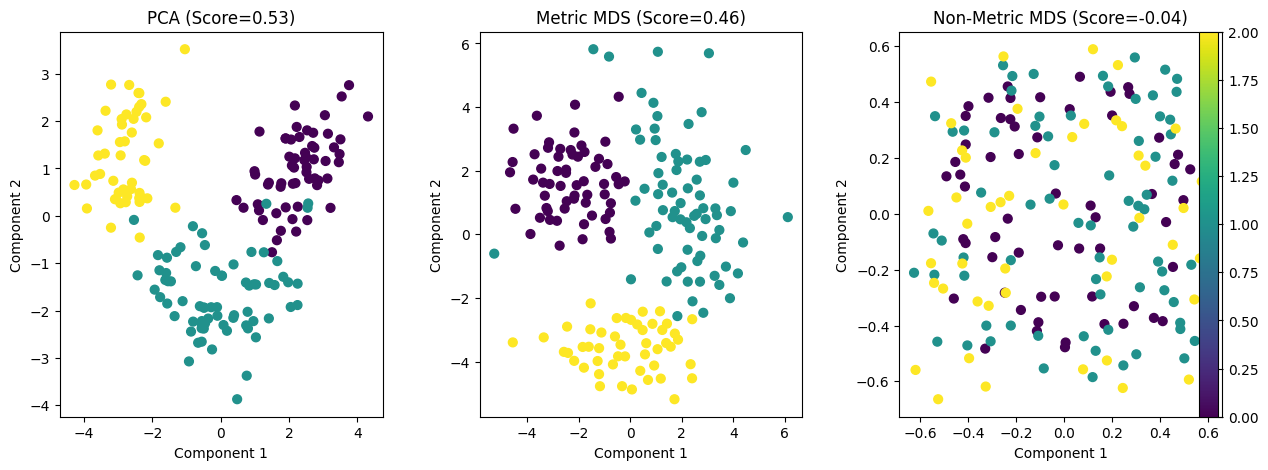

In [3]:
# --- Imports ---
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_score

# --- Load and standardize dataset ---
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
y = wine.target

# --- 1️⃣ PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- 2️⃣ Metric MDS ---
mds_metric = MDS(n_components=2, metric=True, random_state=0)
X_mds_metric = mds_metric.fit_transform(X)

# --- 3️⃣ Non-Metric MDS ---
mds_nonmetric = MDS(n_components=2, metric=False, random_state=0)
X_mds_nonmetric = mds_nonmetric.fit_transform(X)

# --- Calculate Silhouette Scores ---
score_pca = silhouette_score(X_pca, y)
score_metric = silhouette_score(X_mds_metric, y)
score_nonmetric = silhouette_score(X_mds_nonmetric, y)

# --- Print results ---
print("\nSilhouette Scores (higher = clearer separation):")
print(f"PCA: {score_pca:.3f}")
print(f"Metric MDS: {score_metric:.3f}")
print(f"Non-Metric MDS: {score_nonmetric:.3f}")

# --- Single-sentence conclusion ---
print("\nBased on the Silhouette Scores, PCA is the best method.")

# --- Plot 2D embeddings side-by-side ---
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
titles = [
    f'PCA (Score={score_pca:.2f})',
    f'Metric MDS (Score={score_metric:.2f})',
    f'Non-Metric MDS (Score={score_nonmetric:.2f})'
]
embeddings = [X_pca, X_mds_metric, X_mds_nonmetric]

for ax, X_emb, title in zip(axs, embeddings, titles):
    sc = ax.scatter(X_emb[:, 0], X_emb[:, 1], c=y, cmap='viridis', s=40)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

plt.colorbar(sc, ax=axs, fraction=0.02)
plt.subplots_adjust(wspace=0.3)  # ✅ avoids the tight_layout warning
plt.show()



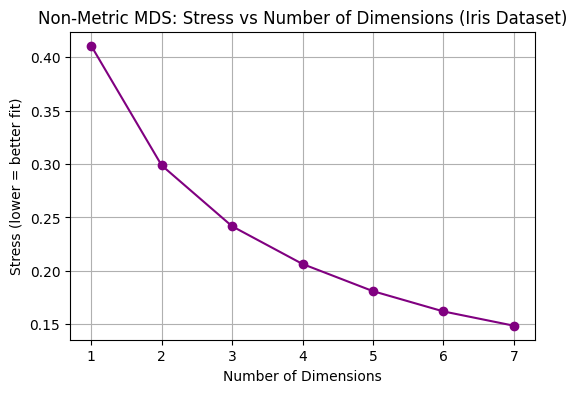

Stress values for each dimensionality:
Dimensions = 1: Stress = 0.4106
Dimensions = 2: Stress = 0.2987
Dimensions = 3: Stress = 0.2417
Dimensions = 4: Stress = 0.2064
Dimensions = 5: Stress = 0.1810
Dimensions = 6: Stress = 0.1620
Dimensions = 7: Stress = 0.1487

As dimensions increase, stress decreases because higher dimensions can preserve pairwise distances more accurately.


In [5]:
# --- Imports ---
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Load and standardize Iris dataset ---
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
y = iris.target

# --- Compute Non-Metric MDS for multiple dimensions ---
dims = range(1, 8)  # from 1D to 7D
stress_values = []

for d in dims:
    mds = MDS(n_components=d, metric=False, random_state=0, n_init=4, max_iter=300)
    mds.fit(X)
    stress_values.append(mds.stress_)

# --- Plot Stress vs. Number of Dimensions ---
plt.figure(figsize=(6, 4))
plt.plot(dims, stress_values, marker='o', linestyle='-', color='purple')
plt.title("Non-Metric MDS: Stress vs Number of Dimensions (Iris Dataset)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Stress (lower = better fit)")
plt.grid(True)
plt.show()

# --- Print results ---
print("Stress values for each dimensionality:")
for d, s in zip(dims, stress_values):
    print(f"Dimensions = {d}: Stress = {s:.4f}")

# --- One-line explanation ---
print("\nAs dimensions increase, stress decreases because higher dimensions can preserve pairwise distances more accurately.")
